<a href="https://colab.research.google.com/github/ngtinc21/Machine-Learning-Algorithms/blob/main/CNN_Example_1_Animal_Image_Classification_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview of Convolutional Neural Network**
A convolutional neural network, or ConvNet, is just a neural network that uses convolution. It is popularly used in **image analysis** and speech recognition.

CNN architecture has three kinds of layers: **convolutional layer**, **pooling layer**, and **fully-connected layer**.

1.   Convolutional layer is responsible for recognizing features in pixels
2.   Pooling layer is responsible for making these features more abstract
3.   Fully-connected layer is responsible for using the acquired features for prediction

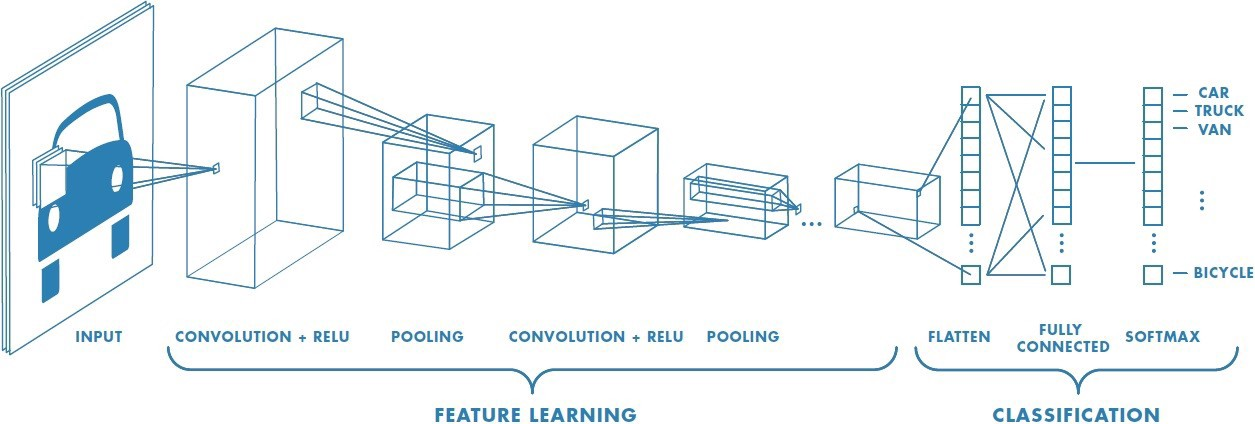

# **Why Uses CNN over the Feed-Forward Neural Nets (ANN)?**

### **Problems of Conventional ANN in Image Classification:**
An image is a matrix of pixel values, e.g. 3x3, 30x30, 108x108....

Conventional ANN flattens the image pixel like

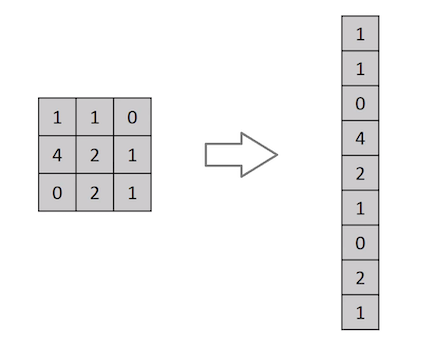

BUT it would have little to no accuracy when it comes to complex images having pixel dependencies throughout. 

For example, in the first colunm of the above example, 1, 4, and 0 are bounded vertically but the flattened pixel did not captures th features

### **Introduction of CNN:**


*   to capture the spatial and temporal dependencies in an image through the application of relevant filters
*   its architecture performs a better fitting to the image dataset due to the reduction in the number of parameters involved and reusability of weights.


### **Role of the CNN:** 

*   to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction
*   important when to design an architecture which is not only good at learning features but also is scalable to massive datasets

The below is an RGB image which has been separated by its three color planes — Red, Green, and Blue. There are a number of such color spaces in which images exist — Grayscale, RGB, HSV, CMYK, etc

For real-life tasks, convolution is usually performed in 3D. The majority of images have 3 dimensions: height, width and depth, where depth corresponds to color channels (1 for a black and white image, 3 for a colour image). So the convolutional filter needs to be 3-dimensional as well. 

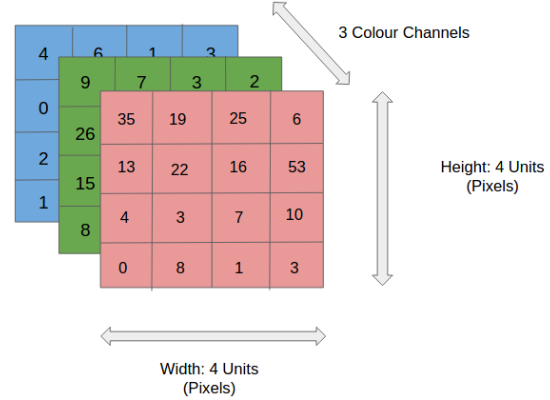


# **Convolution Layer and the Fllter (Kernel)**

Taking the figure below as an allustration, with image dimensions = 5 (Height) x 5 (Breadth) x 1 (Number of channels, eg. RGB).

1.   The green section resembles the 5x5x1 input image
2.   The yellow section is called the Filter/Kernel, which is moving to the right and then continue by going down a row, the example below is a 3x3x1 matrix
3.   It goes over the input image, doing matrix multiplication element after element until the entire image is traversed
4.   The red section is the result for each receptive field (the area where convolution takes place) as a feature map

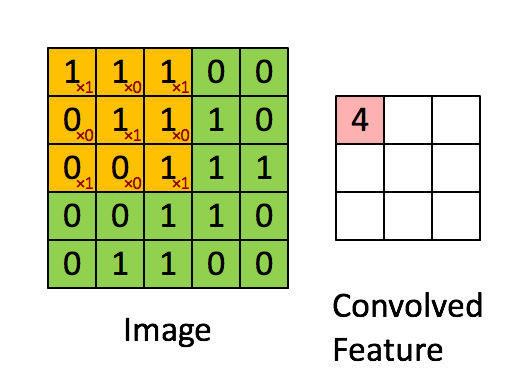

CNN needs not be limited to only one Convolutional Layer. The first CNN layer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. With **added layers**, the architecture adapts to the High-Level features as well, giving the network which has the wholesome understanding of images in the dataset.



## **Filter (Kernal)**

 - **Number of filter increases in each later/deeper layer**, so as to **capture more complex patterns** instead of the simple pattern like edges, corners and dots.

 - Number of filters can start with the range in [32, 64, 128] and increasing up to [256, 512, 1024] in the deeper layers. Conventionally, the values are a power of 2.

 - Kernel size must be an **odd** integer, typically suing (1, 1), (3, 3), (5, 5), and (7, 7).
    - (5, 5) and (7,7) are for image size >= 128x128, and followed by (3, 3)
    - VGGNet, exclusively use (3, 3) filters throughout the entire network

Process of convolution generates a large amount of data, which makes it hard to train the neural network. To compress the data, it needs to go through pooling.

# **Padding and Striding/Pooling layer**


*   **Padding**

    There two types of results to the operation — **Valid Padding** in which the convolved feature is reduced in dimensionality as compared to the input, and the other, **Same Padding** in which the dimensionality is either increased or remains the same.

    *   **Valid Padding**: just like what the above figure shows - 5x5x1 image to 3x3x1 image aftering filtering

    *   **Same Padding**: expands the input matrix by adding fake pixels to the borders of the matrix. Taking an example as shown below, augment the 5x5x1 image into a 6x6x1 image and then apply the 3x3x1 kernel over it, the convolved matrix turns out to be of dimensions 5x5x1.
      - **more people would like to use Same Padding** so that the output of the convolutional layers will be the same size as the input

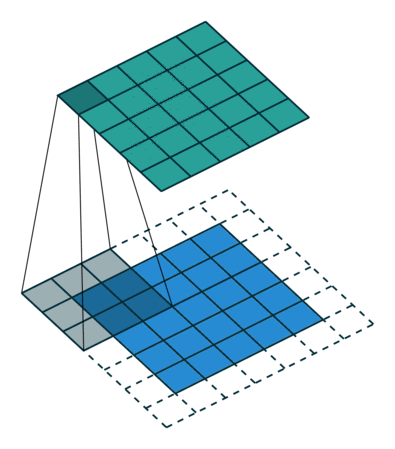

*   **Striding/Pooling Layer**


It is used while it is needed to get an output that is smaller than the input. It reduces spatial size of the convolved features and makes the network more computationally efficient.

   1. **Stride**: **skip some areas** when the kernel slides over, for example, skipping every 2 or 3 pixels. 

   2. Two types of pooling:: 
        - **Max Pooling** (more prefered): returns the maximum value from the portion of the image covered by the Kernel; **discards the noisy activations** altogether and performs a **Noise Suppressant** along with dimensionality reduction
          - highlight the most present feature in the patch, not the average presence of the feature in the case of average pooling

        - **Average Pooling**: returns the average of all the values from the portion of the image covered by the Kernel; performs dimensionality reduction as a **noise suppressant**

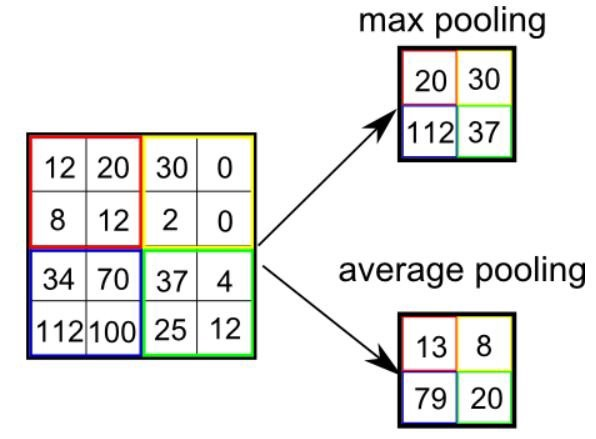

## **Pooling Layer**
Usually, a **pooling layer** is used to receive the result from a convolutional layer and compresses it. The filter of a pooling layer is **always smaller than a feature map**. 

Usually, it takes and compresses a **2x2 square (patch) into one value**. The 2x2 filter would reduce the number of pixels in each feature map to one quarter the size. If there was a feature map sized 10×10, the output map would be 5×5.

The result of pooling layers, the pooled feature maps, would be a summarized version of the features detected in the input. It improves the stability of CNN in classification by capturing the small changes in the pixels, which to be stored in the pooled feature maps in the same location as the input's.

The **convolutional Layer** and the **pooling layer**, together form the i-th layer of a Convolutional Neural Network. Depending on the complexities in the images, the number of such layers may be increased for capturing low-levels details even further, but at the cost of more computational power. 

CNNs usually have more than one convolutional layer.



# **Fully-Connected Layer (FC Layer)**

After the above processes, adding a Fully-Connected layer is a usually convenient way of learning non-linear combinations of the high-level features as represented by the output of the convolutional layer.

As the input image is transferred to a suitable form for the multi-layer perceptron, moving on is to **flatten the final output** into a vector form. **Feed it to a regular (feed-forward) Neural Network** and backpropagation applied to every iteration of training. 

  - **Non-negative activation functions** are prefered in CNN, i.e. relu
  - Undesirably to see a neuron’s output would negatively contribute to the output of the neural network

Over a series of epochs, the model is able to **distinguish between dominating and certain low-level features** in images, and classify them using the Softmax Classification technique.



## **Batch Normalization**
A method to regularize a convolutional network to reduce overfitting
  - Insert a batch normalization layer between convolution and activation layers
  - Sample code:

        model.add(Conv2D(60,3, padding = "same"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))

# **Dropout**

Another technique to regularize a neural network to prevent a CNN from **overfitting**, but only used in the fully-connected net.

*   By randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase
*   As a rule of thumb, place the dropout after the activate function for all activation functions other than **relu**
*   **Start with a dropout rate of 0.5** and **tune it down** until performance is maximized
*   For example, if passing 0.5 to Dropout(), every hidden unit (neuron) is set to 0 with a probability of 0.5
*   Sample code:

        model_dropout = Sequential()
        model_dropout.add(Flatten(input_shape=(28, 28)))
        model_dropout.add(Dense(128))
        model_dropout.add(Dropout(0.5))
        model_dropout.add(Activation('relu'))
        model_dropout.add(Dense(128))
        model_dropout.add(Dropout(0.5))
        model_dropout.add(Activation('relu'))
        model_dropout.add(Dense(10))
        model_dropout.add(Activation('softmax'))
        model_dropout.summary()





# **Advantages and Disadvantages of CNNs**

### **Advantages:**
1.   Feature learning -> no need of manual feature engineering as relevant features would be grasped during training
2.   Computational efficiency -> much more computationally efficient than regular neural networks, by parameter sharing and dimensionality reduction
3.   High accuracy -> usually show higher accuracy than non-convolutional NNs, especially when there is a lot of data involved
4.   Re-usability -> can be retrained for new recognition tasks, enabling to build on pre-existing networks

### **Disadvantages:**
1.   Adversarial attacks -> subtly modification in pixels can make a CNN misclassify seriously, while the modification can be almost undetectable to the human eye

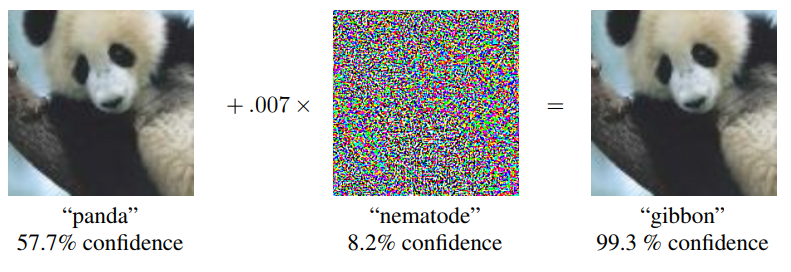

2.   Data-intensive training -> tons of training data needed





## **Diffferent Architectures of CNN**


1.   LeNet-5 (1998)
    
    - The simplest architecture of CNN
    - 2 convolutional and 3 fully-connected layers (hence “5”)
    - Graphical illustration: 

    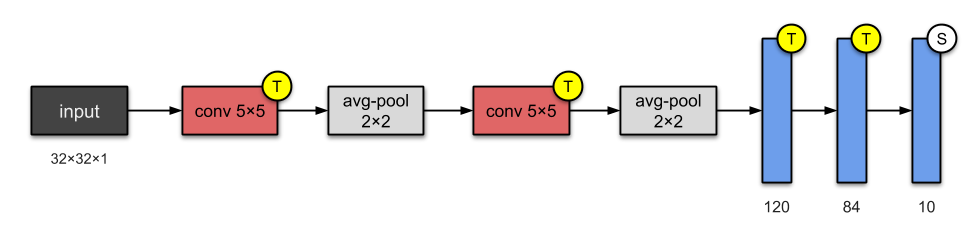

    - Sample code:

    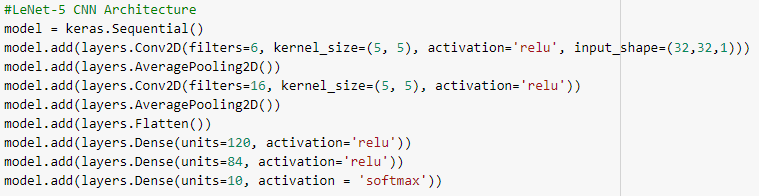






2.   VGG-16 (2014)
    - Stacking more layers onto AlexNet (2012)
    - 13 convolutional and 3 fully-connected layers, with size of 2×2 and 3×3 filters, and ReLu activation
    - Graphical illustration:

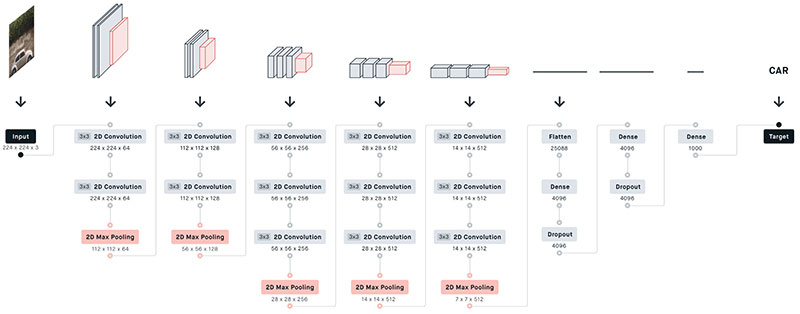

        - Sample code:

       from keras.applications.vgg16 import VGG16
       from keras import Model
       from keras.optimizers import SGD
       from keras.layers import Flatten, Dense

       model=VGG16(input_shape=(108,108,3),include_top=False)
       for layer in model.layers:
           layer.trainable = False
       flat1 = Flatten()(model.layers[-1].output)
       #  "he_uniform" is for relatively deeper network
       class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
       class2 = Dense(62, activation="relu", kernel_initializer="he_uniform")(class1)
       output = Dense(3, activation="softmax")(class1)
       model1 = Model(inputs=model.inputs, outputs=output)
       opt = SGD(lr=0.01, momentum=0.9)
       model1.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])

3.   ResNet (2015)

*   Also known as residual network
*   Using skip connections with deeper network (up to 152 layers)
*   Batch normalisation
*   Sample code:

      
    from keras.applications.resnet50 import ResNet50
    from keras.optimizers import Adam
    from keras.layers import Dropout
    model = ResNet50(include_top=False, input_shape=(108, 108, 3))
    for layer in model.layers:
        layer.trainable = False
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
    class2 = Dense(62, activation="relu", kernel_initializer="he_uniform")(class1)
    output = Dense(3, activation="softmax")(class1)
    model = Model(inputs=model.inputs, outputs=output)
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])




## **Important Tools for Building a CNN**

*   Sequential model

        model = tf.keras.models.Sequential()

*   Layers Conv2D and MaxPooling2D - for image feature learnings

        from tensorflow.keras.layers import Conv2D, MaxPooling2D
    
*   Layers Flatten and Dense - for image classification

        from tensorflow.keras.layers import Flatten, Dense



## **Example 1**
### Image Classification: Dogs, Cats, and Pandas

### i. Data Acquisition

Cloning into 'Dog-Cat-Panda_Images'...
remote: Enumerating objects: 3014, done.
remote: Total 3014 (delta 0), reused 0 (delta 0), pack-reused 3014
Receiving objects: 100% (3014/3014), 187.39 MiB | 41.01 MiB/s, done.
Checking out files: 100% (6007/6007), done.


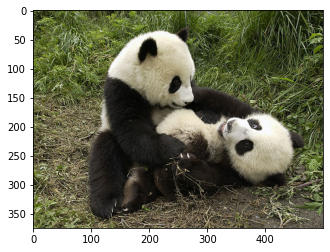

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset
! git clone https://github.com/PrefaceCoding/Dog-Cat-Panda_Images

# Import the os package, from which, load in the listdir function
from os import listdir

# Create an empty list, filenames
filenames = []

# Add the name of each image in the animals/animals folder into the filenames list, 
k="Dog-Cat-Panda_Images/animals/animals"
for file1 in listdir(k): 
    file2 = k+"/"+file1
    for file3 in listdir(file2):
        filenames.append(file3)

# Randomly take out a filename
sample = np.random.choice(filenames)

# Use interpolation to link to the directory
category = sample.split("_")[0]

# Show the image
from keras.preprocessing.image import load_img
img = load_img(f"Dog-Cat-Panda_Images/animals/animals/{category}/{sample}")
plt.imshow(img)

In [4]:
# In the keras.preprocessing.image package, load in the functions load_img and img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Create two empty lists, x and y
x=[]
y=[]

# Load each image in the animals/animals folder using a for loop
# Using the load_img and img_to_array functions, load all the images into a list x
# and add the corresponding classification into list y
k="Dog-Cat-Panda_Images/animals/animals"
for file1 in listdir(k):
    file2=k+"/"+file1
    for file3 in listdir(file2):
        file4=file2+"/"+file3
        image = load_img(file4,target_size=(108,108,3))
        img_array = img_to_array(image)
        x.append(img_array)
        y.append(file1)

# Check the length of both lists to ensure they are both the same length
len(x),len(y)

(3000, 3000)

### ii. Data Preprocessing

In [5]:
# Normalise the values of the pixel by redefining them as a numpy array from a range 0:255 to 0:1
x = np.array(x)/255

# Now check the shape of the variable
# x should have a shape of (3000, 108, 108, 3), signifying 3000 images, of 108x108 with 3 RGB layers
print(x.shape)

(3000, 108, 108, 3)


In [6]:
# Transform the data by redefining them as a numpy array
y = np.array(y)

# Now check the shape of the variable
# y should have a shape of (3000,), signifying 3000 labels
print(y.shape)

(3000,)


In [7]:
# Apply the LabelEncoder function for the classification list
# Encode target labels with value between 0 and n_classes-1, in which n_classes = 3 in this case
# The transformer should be used to encode target values, i.e. y, and not the input X.
# Import the function
from sklearn.preprocessing import LabelEncoder

# Set a variable to initialise the function
k = LabelEncoder()

# Use the .fit_transform method from the function, and fit to the data y, then transform it
y= k.fit_transform(y)
y

array([2, 2, 2, ..., 0, 0, 0])

In [8]:
# Import the to_categorical function from the keras.utils package
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Redefine y by classifying the class vector (integers) as a binary class matrix
y = to_categorical(y)
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [9]:
y.shape

(3000, 3)

In [10]:
# pip list

### iii. Model Building & Training

In [11]:
# Split x and y into a using a 1/3 split
# Select a fix dataset from random_state = 0 for easy illustration
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Import a model
from keras.models import Sequential

# Instanstiation
model = Sequential()

# Add layers
from tensorflow import keras
from keras.layers import Flatten, Dense, BatchNormalization, Dropout, Activation, Conv2D, MaxPooling2D


### The 1st Convolution and Pooling pair
model.add(Conv2D(filters = 4, kernel_size =(5,5), padding = "same", input_shape = (108,108,3), # filter = 16 or 32
# Default parameters of Conv2D:
    strides=(1, 1),                      # Strides of 2×2 in convolutional layer usually are a replacement to max pooling
    kernel_initializer="glorot_uniform", # Usually no need to change except for deeper network, use "he_uniform"
    kernel_regularizer=None))            # Typically a must for large dataset and deep network, for reducing overfitting and increase model's ability to generalize, i.e. L2 regularization -> l2(0.0005))
# # Batch normalization to regularize the convolutional layer
# model.add(BatchNormalization())
# Activation function for the convoutional layer
model.add(Activation("relu"))
# Max pooling layer, with a 2x2 pool size, no strides and valid padding by default
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))

### The 2nd Convolution and Pooling pair
model.add(Conv2D(filters = 8, kernel_size =(5,5), padding = 'same'))
# # Batch normalization to regularize the convolutional layer
# model.add(BatchNormalization())
# Activation function for the convoutional layer
model.add(Activation("relu"))
# Max pooling layer, with a 2x2 pool size, no strides and valid padding by default
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))

# Flatten layer
model.add(Flatten())

# Three Dense layers
model.add(Dense(128))
# model.add(Dropout(0.5))
model.add(Activation("relu"))

model.add(Dense(64))
# model.add(Dropout(0.5))
model.add(Activation("relu"))

# Output layer, with the number of classifications as the number of nodes and softmax as the activation
model.add(Dense(3, activation="softmax"))

# Show tht number of parameters in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 4)       304       
                                                                 
 activation (Activation)     (None, 108, 108, 4)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 8)         808       
                                                                 
 activation_1 (Activation)   (None, 54, 54, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 8)        0         
 2D)                                                    

In [12]:
# Import the SGD function - gradient descent (with momentum) optimizer from keras.optimizers 
# Call the function with learning rate = 0.01, and momentum = 0.9
# opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
opt = keras.optimizers.Adam()

# Compile the model, with the SGD variable as the optimizer, and the appropriate loss, and metrics
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
x.shape

(3000, 108, 108, 3)

In [14]:
# Set up the early stopping for the training to prevent overfitting
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, restore_best_weights=True)

In [15]:
# Fitting the ANN to the dataset
history = model.fit(x_train,y_train,batch_size=32, validation_data=(x_test,y_test), epochs=25, callbacks=[early_stopping], verbose=2)  # if the accuracy is decreasing, it is a signal of overfitting!

Epoch 1/25
66/66 - 22s - loss: 0.9632 - accuracy: 0.4971 - val_loss: 0.8165 - val_accuracy: 0.6011 - 22s/epoch - 336ms/step
Epoch 2/25
66/66 - 21s - loss: 0.7336 - accuracy: 0.6543 - val_loss: 0.7328 - val_accuracy: 0.6344 - 21s/epoch - 315ms/step
Epoch 3/25
66/66 - 21s - loss: 0.6055 - accuracy: 0.7262 - val_loss: 0.7407 - val_accuracy: 0.6478 - 21s/epoch - 315ms/step
Epoch 4/25
66/66 - 21s - loss: 0.5087 - accuracy: 0.7886 - val_loss: 0.7107 - val_accuracy: 0.6689 - 21s/epoch - 315ms/step
Epoch 5/25
66/66 - 21s - loss: 0.4451 - accuracy: 0.8162 - val_loss: 0.8158 - val_accuracy: 0.6389 - 21s/epoch - 314ms/step
Epoch 6/25
66/66 - 21s - loss: 0.3453 - accuracy: 0.8681 - val_loss: 0.7993 - val_accuracy: 0.6667 - 21s/epoch - 313ms/step
Epoch 7/25
66/66 - 21s - loss: 0.2646 - accuracy: 0.8971 - val_loss: 0.8476 - val_accuracy: 0.6833 - 21s/epoch - 315ms/step
Epoch 8/25
66/66 - 21s - loss: 0.1691 - accuracy: 0.9452 - val_loss: 1.1999 - val_accuracy: 0.6644 - 21s/epoch - 314ms/step
Epoch 9/

### iv. Model Prediction

In [16]:
# Prediction (Verify)
# Import the softmax layer
from keras.layers import Softmax

# Import the Sequential model
from keras.models import Sequential

# Generate the prediction model
prediction_model = Sequential([model,Softmax()])

# Prepare the verify test images located in the /images folder
# Add it into two new lists
x_verify=[]
y_verify=[]
k="Dog-Cat-Panda_Images/images"
for file in listdir(k):
  filename = k+"/"+file
  image = load_img(filename,target_size=(108,108,3))
  img_array = img_to_array(image)
  x_verify.append(img_array)
  y_verify.append(file.split(".")[0])

# Using the model, make a prediction onto sample images in the /images folder ( normalise the sample images first)
x_verify = np.array(x_verify)
prediction_verify = prediction_model.predict(x_verify)

In [17]:
# Generate the predicted output and the actual label with a series of print statements
for num,predict in enumerate(prediction_verify):
  index = np.argmax(predict)
  if index == 0:
    index = "cats"
  elif index == 1:
    index = "dogs"
  else:
    index = "panda"
print(f"prediction : {index}\n")
print(f"actual label : {y_verify[num]}\n")

prediction : cats

actual label : dog



In [18]:
# Prediction (dataset)
# Use the prediction model to make a prediction (may take a couple minutes)
prediction = model.predict(np.array(x_test))

In [19]:
# Take a random prediction, and compare the predicted label to the actual label in the y_test list
random = np.random.randint(0,len(np.array(x_test)))

predict = np.argmax(prediction[random])
if predict == 0:
  predict = "cats"
elif predict == 1:
  predict = "dogs"
else:
  predict = "panda"

print(f"prediction : {predict}")
print(f'matrix : {prediction[random]}')
print(f"actual label : {y_test[random]}")


prediction : panda
matrix : [0.00937109 0.05715574 0.93347317]
actual label : [0. 0. 1.]


### v. Model Evaluation

In [20]:
# Evaluate the accuracy of the model
loss, acc = model.evaluate(x_test,y_test, verbose=0)
acc

0.6688888669013977

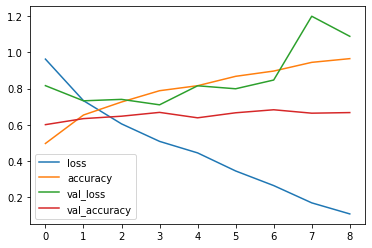

In [21]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [ ]:
plt.figure(figsize=(15,5))

for i in range(3):
    plt.subplot(4,8,2*i+1)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(prediction[i]) == y_test[i][0]:
        color = 'blue'
    else:
        color = 'red'
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                100*np.max(prediction[i]),
                                class_names[y_test[i][0]]),
                                color=color)
    plt.subplot(4,8,2*i+2)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction[i], color="grey")
    plt.ylim([0, 1])  

    thisplot[np.argmax(prediction[i])].set_color('red')
    thisplot[y_test[i][0]].set_color('blue')
    
plt.show()

## **Trials of VGG-16 and ResNet model**

In [ ]:
def VGG16_model(x_train ,y_train, x_test, y_test):
   from keras.applications.vgg16 import VGG16
   from keras import Model

   model=VGG16(input_shape=(108,108,3),include_top=False)
   for layer in model.layers:
       layer.trainable = False
   flat1 = Flatten()(model.layers[-1].output)
   #  "he_uniform" is for relatively deeper network
   class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
   class2 = Dense(62, activation="relu", kernel_initializer="he_uniform")(class1)
   output = Dense(3, activation="softmax")(class1)
   model1 = Model(inputs=model.inputs, outputs=output)
   opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
   model1.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
   early_stopping = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, restore_best_weights=True)
   history_VGG = model1.fit(x_train,y_train,batch_size=32, validation_data=(x_test,y_test),epochs=12,verbose=1, callbacks=[early_stopping])
   _, acc = model1.evaluate(x_test,y_test, verbose=0)
   return acc
VGG16_model(x_train ,y_train, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/12
66/66 [==============================] - 337s 5s/step - loss: 0.7545 - accuracy: 0.6719 - val_loss: 0.5012 - val_accuracy: 0.7978
Epoch 2/12
66/66 [==============================] - 336s 5s/step - loss: 0.4945 - accuracy: 0.7929 - val_loss: 0.6874 - val_accuracy: 0.6889
Epoch 3/12
66/66 [==============================] - 336s 5s/step - loss: 0.5051 - accuracy: 0.7919 - val_loss: 0.8483 - val_accuracy: 0.6667
Epoch 4/12
66/66 [==============================] - 336s 5s/step - loss: 0.3864 - accuracy: 0.8533 - val_loss: 1.0288 - val_accuracy: 0.6311
Epoch 5/12
66/66 [==============================] - 334s 5s/step - loss: 0.4079 - accuracy: 0.8343 - val_loss: 0.6674 - val_accuracy: 0.7411
Epoch 6/12
11/66 [====>.........................] - ETA: 3:16 - loss: 0.2823 - accuracy: 0.8864

In [ ]:
def ResNet_model(x_train ,y_train, x_test, y_test):
  from keras.applications.resnet50 import ResNet50
  model = ResNet50(include_top=False, input_shape=(108, 108, 3), pooling = 'max')
  for layer in model.layers:
      layer.trainable = False

  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
  class2 = Dense(62, activation="relu", kernel_initializer="he_uniform")(class1)
  output = Dense(3, activation="softmax")(class1)
  model2 = Model(inputs=model.inputs, outputs=output)
  opt = Adam(lr=0.001)
  model2.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  early_stopping = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=1, restore_best_weights=True)
  history_ResNet = model2.fit(x_train,y_train,batch_size=32, validation_data=(x_test,y_test),epochs=12,verbose=1, callbacks=[early_stopping])
  loss, acc = model2.evaluate(x_test, y_test, verbose=0)
  return acc
ResNet_model(x_train ,y_train, x_test, y_test)